In [92]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
"test"[:-2]

'te'

In [9]:
df = pd.read_csv("core_data_nyc/median_household_income_by_tract.csv")

In [10]:
df_tracts = pd.read_csv("core_data_nyc/census_tract_to_nta.csv")

In [55]:
df_tracts.NTACode.nunique()

195

In [11]:
df_tracts

,the_geom,BoroName,CTLabel,BoroCode,BoroCT2010,CT2010,CDEligibil,NTACode,NTAName,Shape_Leng,PUMA,Shape_Area
0,MULTIPOLYGON (((-74.07920577013245 40.64343078...,Staten Island,9.00,5,5000900,900,I,SI22,West New Brighton-New Brighton-St. George,7729.016794,3903,2.497010e+06
1,MULTIPOLYGON (((-73.96432543478758 40.75638153...,Manhattan,98.00,1,1009800,9800,I,MN19,Turtle Bay-East Midtown,5534.199811,3808,1.906016e+06
2,MULTIPOLYGON (((-73.96802436915851 40.75957814...,Manhattan,100.00,1,1010000,10000,I,MN19,Turtle Bay-East Midtown,5692.168737,3808,1.860938e+06
3,MULTIPOLYGON (((-73.97124277307127 40.76093641...,Manhattan,102.00,1,1010200,10200,I,MN17,Midtown-Midtown South,5687.802439,3807,1.860993e+06
4,MULTIPOLYGON (((-73.97445730550224 40.76229308...,Manhattan,104.00,1,1010400,10400,I,MN17,Midtown-Midtown South,5693.036367,3807,1.864600e+06
5,MULTIPOLYGON (((-73.98411754823195 40.75484205...,Manhattan,113.00,1,1011300,11300,I,MN17,Midtown-Midtown South,5699.860641,3807,1.890907e+06
6,MULTIPOLYGON (((-73.96475544914023 40.76405707...,Manhattan,114.02,1,1011402,11402,I,MN40,Upper East Side-Carnegie Hill,4125.256029,3805,1.063547e+06
7,MULTIPOLYGON (((-73.96147581181627 40.77432401...,Manhattan,130.00,1,1013000,13000,I,MN40,Upper East Side-Carnegie Hill,5807.972956,3805,1.918145e+06
8,MULTIPOLYGON (((-73.95494520074165 40.77750394...,Manhattan,140.00,1,1014000,14000,I,MN40,Upper East Side-Carnegie Hill,5820.815640,3805,1.925984e+06
9,MULTIPOLYGON (((-73.95398370221397 40.77882211...,Manhattan,148.01,1,1014801,14801,I,MN40,Upper East Side-Carnegie Hill,3135.951423,3805,5.592162e+05


In [12]:
df_tracts_to_nta = df_tracts[["BoroCT2010", "NTACode","NTAName"]]

In [13]:
df_tracts_to_nta[["BoroCT2010_str"]] = df_tracts_to_nta[["BoroCT2010"]].astype(str)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
df_tracts_to_nta["BoroCT2010_str"].str[-6:]

0       000900
1       009800
2       010000
3       010200
4       010400
5       011300
6       011402
7       013000
8       014000
9       014801
10      018400
11      019000
12      020600
13      024900
14      026100
15      026300
16      026700
17      026900
18      027700
19      000501
20      002000
21      004100
22      005800
23      006000
24      006700
25      006900
26      007400
27      007600
28      007800
29      008000
         ...  
2136    000301
2137    000700
2138    004700
2139    005100
2140    054900
2141    055100
2142    044900
2143    059300
2144    005300
2145    039800
2146    005900
2147    009700
2148    010300
2149    019900
2150    007800
2151    020500
2152    015602
2153    017011
2154    006400
2155    103202
2156    008000
2157    007000
2158    101001
2159    138501
2160    147100
2161    003700
2162    004900
2163    006300
2164    007100
2165    007300
Name: BoroCT2010_str, Length: 2166, dtype: object

In [20]:
df_tracts_to_nta['merge_identifier'] = df_tracts_to_nta["BoroCT2010_str"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
df_tracts_to_nta[df_tracts_to_nta["BoroName"] == "Manhattan"]['BoroInitials'] = "MN"

KeyError: 'BoroName'

In [16]:
df_tracts_to_nta.merge_identifier.nunique()

2166

In [39]:
df_tracts_to_nta

,BoroCT2010,NTACode,NTAName,BoroCT2010_str,merge_identifier
0,5000900,SI22,West New Brighton-New Brighton-St. George,5000900,5000900
1,1009800,MN19,Turtle Bay-East Midtown,1009800,1009800
2,1010000,MN19,Turtle Bay-East Midtown,1010000,1010000
3,1010200,MN17,Midtown-Midtown South,1010200,1010200
4,1010400,MN17,Midtown-Midtown South,1010400,1010400
5,1011300,MN17,Midtown-Midtown South,1011300,1011300
6,1011402,MN40,Upper East Side-Carnegie Hill,1011402,1011402
7,1013000,MN40,Upper East Side-Carnegie Hill,1013000,1013000
8,1014000,MN40,Upper East Side-Carnegie Hill,1014000,1014000
9,1014801,MN40,Upper East Side-Carnegie Hill,1014801,1014801


In [38]:
df_tracts_to_nta.NTACode.nunique()

195

In [17]:
df_tracts_to_nta.NTACode.unique()

array(['SI22', 'MN19', 'MN17', 'MN40', 'MN34', 'MN11', 'MN03', 'MN36',
       'MN35', 'BK09', 'BK32', 'BK38', 'BK31', 'BK33', 'BK34', 'BK88',
       'BK30', 'BK37', 'BK27', 'BK28', 'BK69', 'BK61', 'BK75', 'BK35',
       'BK78', 'BK29', 'BK63', 'BK60', 'BK21', 'BK79', 'BK25', 'BK77',
       'BK46', 'BK43', 'BK42', 'BK90', 'BK76', 'BK73', 'BK72', 'BK44',
       'BK17', 'BK45', 'BK58', 'BK91', 'BK95', 'BK96', 'BK81', 'BK50',
       'BX31', 'BK82', 'BK85', 'BK83', 'BX39', 'BX09', 'BX55', 'BX27',
       'BX35', 'BX33', 'BX14', 'BX52', 'BX99', 'BX59', 'BX08', 'BX63',
       'QN55', 'BX37', 'BX36', 'BX49', 'BX29', 'BX07', 'BX17', 'BX44',
       'BX05', 'BX28', 'BX43', 'BX62', 'QN53', 'QN54', 'QN68', 'QN70',
       'QN71', 'QN72', 'QN60', 'QN31', 'QN76', 'QN35', 'QN63', 'QN01',
       'QN29', 'QN28', 'QN08', 'QN27', 'QN25', 'QN26', 'QN61', 'QN20',
       'QN50', 'QN30', 'QN34', 'QN07', 'QN33', 'QN19', 'QN21', 'QN05',
       'QN18', 'QN17', 'QN37', 'QN62', 'QN22', 'QN52', 'QN51', 'QN10',
      

In [26]:
df.shape

(2167, 7)

In [27]:
df.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016,census_tract_str,merge_identifier
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705,36061020901,1020901
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863,36061021000,1021000
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891,36061021100,1021100
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177,36061021200,1021200
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800,36061021303,1021303


In [29]:
df[["census_tract_str"]] = df[["Census Tract"]].astype(str)

In [30]:
df['merge_identifier']=df['census_tract_str'].str[4:]

In [31]:
df.merge_identifier.nunique()

1994

In [32]:
df['Census Tract'].nunique()

2167

In [33]:
df_new2 = df.merge(df_tracts_to_nta, how = 'left', on = 'merge_identifier')

In [34]:
df_new2

,short_name,long_name,Census Tract,2007-2011,2012-2016,census_tract_str,merge_identifier,BoroCT2010,NTACode,NTAName,BoroCT2010_str
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705,36061020901,1020901,1020901.0,MN09,Morningside Heights,1020901
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863,36061021000,1021000,1021000.0,MN34,East Harlem North,1021000
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891,36061021100,1021100,1021100.0,MN09,Morningside Heights,1021100
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177,36061021200,1021200,1021200.0,MN03,Central Harlem North-Polo Grounds,1021200
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800,36061021303,1021303,1021303.0,MN06,Manhattanville,1021303
5,hh_inc_med_adj,Median household income ($2017),36061021400,39135.816049,52546.783969,36061021400,1021400,1021400.0,MN03,Central Harlem North-Polo Grounds,1021400
6,hh_inc_med_adj,Median household income ($2017),36061021500,34551.687806,32015.630475,36061021500,1021500,1021500.0,MN03,Central Harlem North-Polo Grounds,1021500
7,hh_inc_med_adj,Median household income ($2017),36061021600,42641.389645,60837.956448,36061021600,1021600,1021600.0,MN11,Central Harlem South,1021600
8,hh_inc_med_adj,Median household income ($2017),36061021703,NaN,NaN,36061021703,1021703,1021703.0,MN06,Manhattanville,1021703
9,hh_inc_med_adj,Median household income ($2017),36061021800,43421.851299,49376.929660,36061021800,1021800,1021800.0,MN11,Central Harlem South,1021800


In [35]:
df_new2.shape

(2167, 11)

In [36]:
df_new2['NTACode'].nunique()

48

In [43]:
df_median_household_income = pd.read_csv("core_data_nyc/median_household_income_by_tract.csv")

In [56]:
df_median_household_income['Census Tract'].nunique()

2167

In [57]:
df_median_household_income

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800
5,hh_inc_med_adj,Median household income ($2017),36061021400,39135.816049,52546.783969
6,hh_inc_med_adj,Median household income ($2017),36061021500,34551.687806,32015.630475
7,hh_inc_med_adj,Median household income ($2017),36061021600,42641.389645,60837.956448
8,hh_inc_med_adj,Median household income ($2017),36061021703,NaN,NaN
9,hh_inc_med_adj,Median household income ($2017),36061021800,43421.851299,49376.929660


In [44]:
df_median_household_income.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800


In [89]:
db_test = pd.read_csv("core_data_nyc/nta_neighborhood_census_tract.csv")

In [90]:
db_test.head()

,Borough,2010 Census Bureau FIPS County Code,2010 NYC Borough Code,2010 Census Tract,PUMA,Neighborhood Tabulation Area (NTA)Code,Neighborhood Tabulation Area (NTA) Name
0,Bronx,5,2,31000,3704,BX31,Allerton-Pelham Gardens
1,Bronx,5,2,31200,3704,BX31,Allerton-Pelham Gardens
2,Bronx,5,2,31400,3704,BX31,Allerton-Pelham Gardens
3,Bronx,5,2,31600,3704,BX31,Allerton-Pelham Gardens
4,Bronx,5,2,31800,3704,BX31,Allerton-Pelham Gardens


In [50]:
db_crime_nta.shape

(59, 15)

In [46]:
db_crime_nta.head()

,short_name,long_name,Community District,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,crime_all_rt,"Serious crime rate (per 1,000 residents)",SI 02 - South Beach/Willowbrook,6.736391,7.641397,7.381700,6.272084,5.560480,5.348363,6.401370,6.355916,6.287736,6.265009,6.355916,4.893828
1,crime_all_rt,"Serious crime rate (per 1,000 residents)",SI 03 - Tottenville/Great Kills,4.545217,4.571376,4.787192,3.943548,3.807526,4.163312,3.957331,3.801285,3.707657,3.620271,3.046021,2.840040
2,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 01 - Financial District,41.226031,39.889599,36.141778,33.207438,16.661747,16.956935,16.054971,15.858178,15.349798,17.645708,17.137328,16.776542
3,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 02 - Greenwich Village/Soho,34.289458,32.163146,30.337525,29.005896,27.839495,27.072965,28.106114,28.450498,25.484358,27.039637,24.006843,23.817988
4,crime_all_rt,"Serious crime rate (per 1,000 residents)",MN 03 - Lower East Side/Chinatown,14.512764,14.281630,14.445857,13.557817,13.296423,13.112686,14.012996,14.098740,13.124935,13.400540,14.282477,13.645523


In [48]:
db_crime_nta['Community District'].unique()

array(['SI 02 - South Beach/Willowbrook',
       'SI 03 - Tottenville/Great Kills', 'MN 01 - Financial District',
       'MN 02 - Greenwich Village/Soho',
       'MN 03 - Lower East Side/Chinatown', 'MN 04 - Clinton/Chelsea',
       'MN 05 - Midtown', 'MN 06 - Stuyvesant Town/Turtle Bay',
       'MN 07 - Upper West Side', 'MN 08 - Upper East Side',
       'MN 09 - Morningside Heights/Hamilton', 'MN 10 - Central Harlem',
       'MN 11 - East Harlem', 'MN 12 - Washington Heights/Inwood',
       'BX 01 - Mott Haven/Melrose', 'BX 02 - Hunts Point/Longwood',
       'BX 03 - Morrisania/Crotona', 'BX 04 - Highbridge/Concourse',
       'BX 05 - Fordham/University Heights',
       'BX 06 - Belmont/East Tremont',
       'BX 07 - Kingsbridge Heights/Bedford',
       'BX 08 - Riverdale/Fieldston', 'BX 09 - Parkchester/Soundview',
       'BX 10 - Throgs Neck/Co-op City', 'BX 11 - Morris Park/Bronxdale',
       'BX 12 - Williamsbridge/Baychester',
       'BK 01 - Greenpoint/Williamsburg',
       'BK

In [49]:
db_crime_nta['Community District'].str[:5]

0     SI 02
1     SI 03
2     MN 01
3     MN 02
4     MN 03
5     MN 04
6     MN 05
7     MN 06
8     MN 07
9     MN 08
10    MN 09
11    MN 10
12    MN 11
13    MN 12
14    BX 01
15    BX 02
16    BX 03
17    BX 04
18    BX 05
19    BX 06
20    BX 07
21    BX 08
22    BX 09
23    BX 10
24    BX 11
25    BX 12
26    BK 01
27    BK 02
28    BK 03
29    BK 04
30    BK 05
31    BK 06
32    BK 07
33    BK 08
34    BK 09
35    BK 10
36    BK 11
37    BK 12
38    BK 13
39    BK 14
40    BK 15
41    BK 16
42    BK 17
43    BK 18
44    QN 01
45    QN 02
46    QN 14
47    SI 01
48    QN 03
49    QN 04
50    QN 05
51    QN 06
52    QN 07
53    QN 08
54    QN 09
55    QN 10
56    QN 11
57    QN 12
58    QN 13
Name: Community District, dtype: object

In [ ]:
db_crime_nta['borough'] = db_crime_nta['Community District'].str[:2]

In [60]:
db_rent_tract = pd.read_csv("core_data_nyc/median_rent_by_tract.csv")

In [63]:
db_rent_tract['Census Tract'].nunique()

2167

In [64]:
df_median_household_income['Census Tract'].nunique()

2167

In [73]:
db_rent_tract.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016,median_rent_07_to_11,median_rent_12_to_16,census_tract
0,rent_gross_med_adj,"Median rent, all ($2017)",36005025100,1166.356583,1085.845879,1166.356583,1085.845879,36005025100
1,rent_gross_med_adj,"Median rent, all ($2017)",36005025200,1157.684787,1424.344313,1157.684787,1424.344313,36005025200
2,rent_gross_med_adj,"Median rent, all ($2017)",36005025300,1038.447590,1183.724944,1038.447590,1183.724944,36005025300
3,rent_gross_med_adj,"Median rent, all ($2017)",36005025400,1127.333500,1358.072029,1127.333500,1358.072029,36005025400
4,rent_gross_med_adj,"Median rent, all ($2017)",36005025500,1063.379004,1079.728438,1063.379004,1079.728438,36005025500


In [68]:
db_rent_tract['median_rent_07_to_11'] = db_rent_tract['2007-2011']

In [70]:
db_rent_tract['median_rent_12_to_16'] = db_rent_tract['2012-2016']

In [72]:
db_rent_tract['census_tract'] = db_rent_tract['Census Tract']

In [74]:
df_rent = db_rent_tract[['census_tract','median_rent_07_to_11', 'median_rent_12_to_16']]

In [86]:
df_rent.shape

(2167, 3)

In [77]:
df_rent.head()

,census_tract,median_rent_07_to_11,median_rent_12_to_16
0,36005025100,1166.356583,1085.845879
1,36005025200,1157.684787,1424.344313
2,36005025300,1038.447590,1183.724944
3,36005025400,1127.333500,1358.072029
4,36005025500,1063.379004,1079.728438


In [82]:
df_median_household_income.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016,census_tract,median_income_07_to_11,median_income_12_to_16
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705,36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863,36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891,36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177,36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800,36061021303,46358.338272,37478.505800


In [78]:
df_median_household_income['census_tract'] = df_median_household_income['Census Tract']

In [79]:
df_median_household_income['median_income_07_to_11'] = df_median_household_income['2007-2011']

In [81]:
df_median_household_income['median_income_12_to_16'] = df_median_household_income['2012-2016']

In [83]:
df_income = df_median_household_income[['census_tract','median_income_07_to_11', 'median_income_12_to_16']]

In [85]:
df_income.shape

(2167, 3)

In [87]:
df_combined = df_income.merge(df_rent, on='census_tract')

In [101]:
df_combined

,census_tract,median_income_07_to_11,median_income_12_to_16,median_rent_07_to_11,median_rent_12_to_16
0,36061020901,26868.476413,22646.768705,558.246877,820.756744
1,36061021000,37333.166423,30517.876863,757.698189,946.164297
2,36061021100,56176.979469,47939.330891,1029.775793,1140.902853
3,36061021200,60259.227509,55064.111177,1142.509143,1532.419114
4,36061021303,46358.338272,37478.505800,1057.959131,1258.153817
5,36061021400,39135.816049,52546.783969,985.332838,1186.783665
6,36061021500,34551.687806,32015.630475,922.462316,1118.472234
7,36061021600,42641.389645,60837.956448,1021.103997,1200.038122
8,36061021703,NaN,NaN,NaN,NaN
9,36061021800,43421.851299,49376.929660,1126.249526,1207.175137


In [91]:
#df_combined.to_csv("core_data_nyc/median_rent_and_income_by_tract.csv")

In [95]:
model = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11', data=df_combined).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


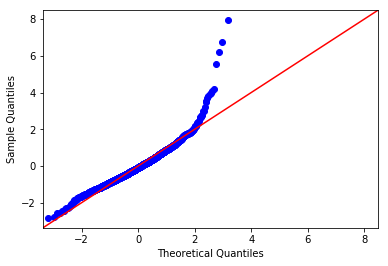

In [98]:
residual = model.resid
fig = sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)
fig.show()

In [99]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.3136940504759202), ('p-value', 0.00015517207744427015)]

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.608
Model:                                OLS   Adj. R-squared:                  0.607
Method:                     Least Squares   F-statistic:                     2175.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          1.22e-287
Time:                            11:36:18   Log-Likelihood:                -15448.
No. Observations:                    1407   AIC:                         3.090e+04
Df Residuals:                        1405   BIC:                         3.091e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.491e+04   1437.344    -10.374      0.000   -1.77e+04   -1.21e+04
median_rent_07_to_11    53.3946      1.145     46.636      0.000      51.149      55.641
==============================================================================
Omnibus:                      443.114   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.626
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       9.327   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
model2 = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11', 
                 data=df_combined.sort_values(by=['median_income_07_to_11'])[:-300]).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


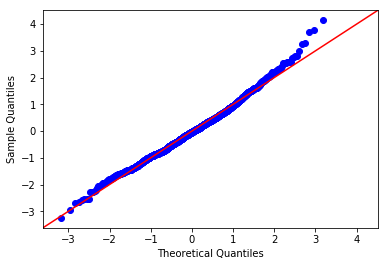

In [120]:
residual2 = model2.resid
fig = sm.graphics.qqplot(residual2, dist=stats.norm, line='45', fit=True)
fig.show()

In [121]:
df_combined.shape

(2167, 5)

In [122]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.542
Model:                                OLS   Adj. R-squared:                  0.542
Method:                     Least Squares   F-statistic:                     1571.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          2.62e-227
Time:                            11:43:04   Log-Likelihood:                -14296.
No. Observations:                    1329   AIC:                         2.860e+04
Df Residuals:                        1327   BIC:                         2.861e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3397.5032   1286.358     -2.641      0.008   -5921.021    -873.985
median_rent_07_to_11    42.1766      1.064     39.633      0.000      40.089      44.264
==============================================================================
Omnibus:                       32.161   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.794
Skew:                           0.339   Prob(JB):                     1.69e-08
Kurtosis:                       3.433   Cond. No.                     4.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
model3 = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11 ** 2', 
                 data=df_combined).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


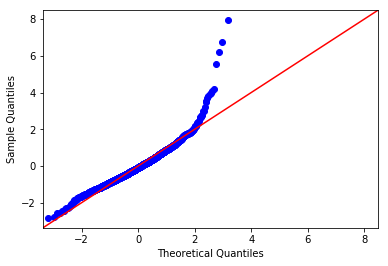

In [131]:
residual3 = model3.resid
fig = sm.graphics.qqplot(residual3, dist=stats.norm, line='45', fit=True)
fig.show()

In [132]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.608
Model:                                OLS   Adj. R-squared:                  0.607
Method:                     Least Squares   F-statistic:                     2175.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          1.22e-287
Time:                            11:47:13   Log-Likelihood:                -15448.
No. Observations:                    1407   AIC:                         3.090e+04
Df Residuals:                        1405   BIC:                         3.091e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.491e+04   1437.344    -10.374      0.000   -1.77e+04   -1.21e+04
median_rent_07_to_11    53.3946      1.145     46.636      0.000      51.149      55.641
==============================================================================
Omnibus:                      443.114   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.626
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       9.327   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


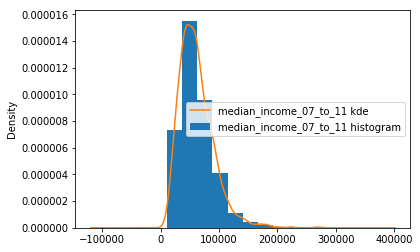

In [133]:
df_combined['median_income_07_to_11'].plot.hist(normed=True, label = 'median_income_07_to_11 histogram')
df_combined['median_income_07_to_11'].plot.kde(label ='median_income_07_to_11 kde')
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


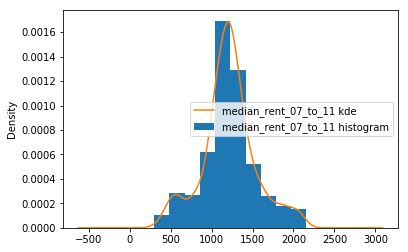

In [134]:
df_combined['median_rent_07_to_11'].plot.hist(normed=True, label = 'median_rent_07_to_11 histogram')
df_combined['median_rent_07_to_11'].plot.kde(label ='median_rent_07_to_11 kde')
plt.legend()
plt.show()

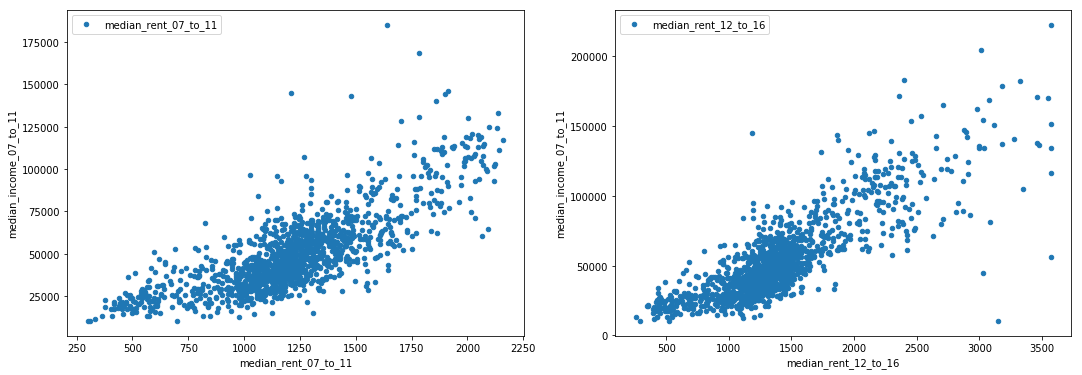

In [136]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
    df_combined.plot(kind='scatter', x=dollars, y='median_income_07_to_11', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

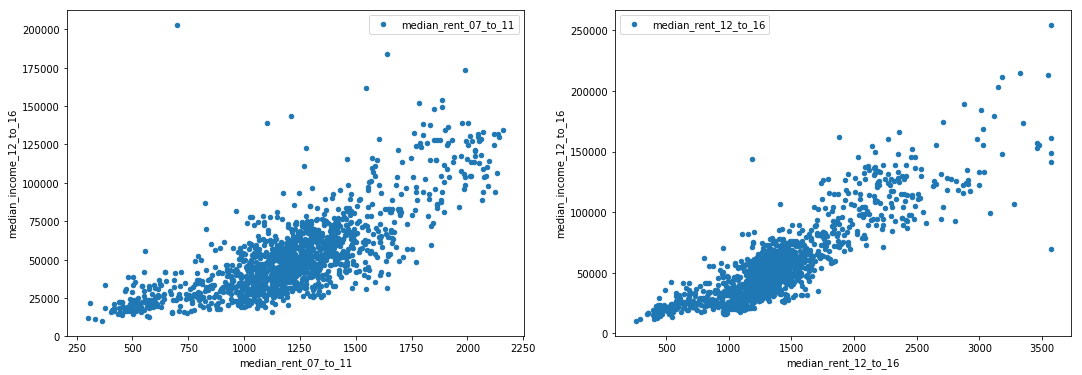

In [137]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
    df_combined.plot(kind='scatter', x=dollars, y='median_income_12_to_16', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

In [139]:
test

(1.3136940504759202, 0.00015517207744427015, 'increasing')

In [140]:
df_key = pd.read_csv("df_key2.csv")

In [142]:
df_key.head()

,Unnamed: 0,Unnamed: 0.1,borough,ct2010,zipcode,NTA_code,NTA_name,match_id,2010 Census Bureau FIPS County Code,2010 NYC Borough Code,2010 Census Tract,PUMA
0,0,0,QN,1099.00,11361.0,QN46,Bayside-Bayside Hills,QN1099.0,81.0,4.0,1099.0,4104.0
1,1,2,SI,277.02,10314.0,NaN,NaN,SI277.02,NaN,NaN,NaN,NaN
2,2,3,BK,546.00,11210.0,BK43,Midwood,BK546.0,47.0,3.0,546.0,4015.0
3,3,5,BK,552.00,11229.0,BK44,Madison,BK552.0,47.0,3.0,552.0,4016.0
4,4,6,QN,595.00,11385.0,QN20,Ridgewood,QN595.0,81.0,4.0,595.0,4110.0


In [147]:
#df_combined[df_combined['census_tract'].str == 36061020901]

In [146]:
df_combined.head()

,census_tract,median_income_07_to_11,median_income_12_to_16,median_rent_07_to_11,median_rent_12_to_16
0,36061020901,26868.476413,22646.768705,558.246877,820.756744
1,36061021000,37333.166423,30517.876863,757.698189,946.164297
2,36061021100,56176.979469,47939.330891,1029.775793,1140.902853
3,36061021200,60259.227509,55064.111177,1142.509143,1532.419114
4,36061021303,46358.338272,37478.505800,1057.959131,1258.153817
